# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Loading the data

In [2]:
x = pd.read_csv("https://s3.amazonaws.com/drivendata/data/57/public/train_values.csv")
y = pd.read_csv("https://s3.amazonaws.com/drivendata/data/57/public/train_labels.csv")

In [5]:
df = pd.merge(x, y, left_on = 'building_id', right_on= 'building_id')

In [6]:
df['damage_grade'] = df['damage_grade'].astype("category")

## Understanding the data

In [7]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

## Distribution of Data

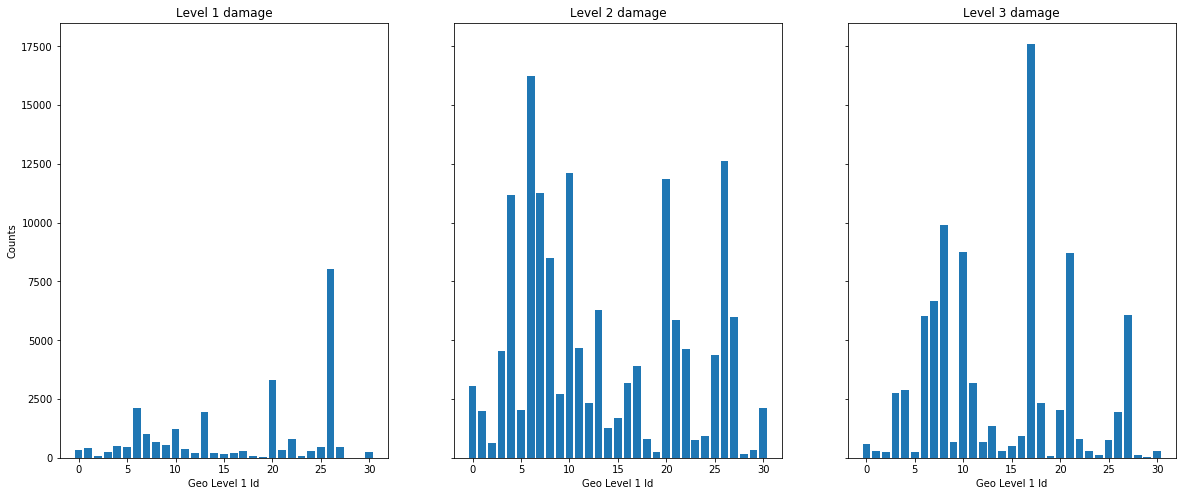

In [9]:
# By location

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8), sharex=True, sharey=True)

ax1.set_title("Level 1 damage")
ax1.set_xlabel("Geo Level 1 Id")
ax1.set_ylabel("Counts")
ax1.set_ylim(top = 18500)
ax1.bar(df[df['damage_grade'] == 1]['geo_level_1_id'].value_counts().index, df[df['damage_grade'] == 1]['geo_level_1_id'].value_counts().values)

ax2.set_title("Level 2 damage")
ax2.set_xlabel("Geo Level 1 Id")
ax2.bar(df[df['damage_grade'] == 2]['geo_level_1_id'].value_counts().index, df[df['damage_grade'] == 2]['geo_level_1_id'].value_counts().values)

ax3.set_title("Level 3 damage")
ax3.set_xlabel("Geo Level 1 Id")
ax3.bar(df[df['damage_grade'] == 3]['geo_level_1_id'].value_counts().index, df[df['damage_grade'] == 3]['geo_level_1_id'].value_counts().values)

plt.show()

 <b> From these plots, we see that: </b><br>
 * Majority of the buildings suffered level 2 damage, followed by level 3 damage. 
 * A fairly large number occurrences of damage (in any level) are in the Geo Level 1 areas 5 to 10
 * Geo level 1 Id 17 sufferred the most number and highest level of damage
 * The distribution of damages by region, while not definitively conclusive, can point a direction of further investigation. Inferences cannot be reliably made due to various reasons, e.g is the higher damage level and occurrences due to factors like being close to the seismic epicenter, the properties of the buildings or simply because those areas had greater density of buildings?

In [10]:
# Finding damage grade breakdown for each geo level 1 id
# df.groupby(["geo_level_1_id",'damage_grade'])['building_id'].count()/df.groupby(["geo_level_1_id"])['building_id'].count()

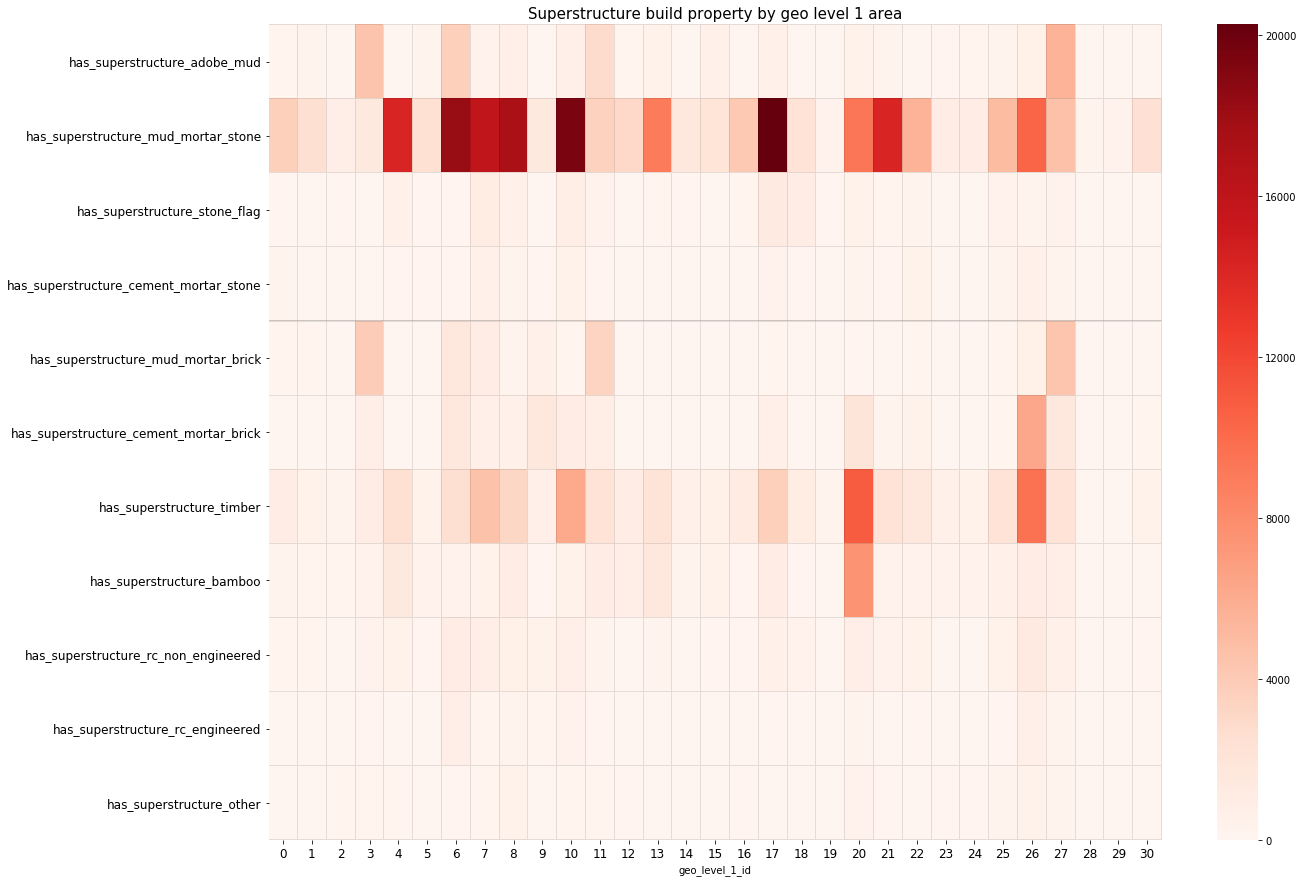

In [11]:
# Superstructure property by area

plt.figure(figsize=(20,15))
plt.title("Superstructure build property by geo level 1 area", size= 15)
sns.heatmap(df.groupby("geo_level_1_id").sum().filter(regex="^has_superstructure", axis=1).T, 
            cmap="Reds", linewidths=0.05, linecolor=(0,0,0,0.1))
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

<b> From this heatmap, we see that: </b><br>
* Most buildings have superstructure made of mud mortart
* To be continued